Introduction

Under HR analytics project we are analyzing that what are the important factors which influenced attrition rate in an organization which reasults high cost to an organization.High attrition become a problem to any business. Our Study is based on 35 factors which can be a reason for high employee attrition.

Dataset
The dataset which used in this case study is hr_data.csv contain 1470 instance with 35 features:-Age,Attrition,BusinessTravel,EducationalFiel,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,OverTime,PerformanceRating,Relationshipsatisfaction,StockoptionLevel,Totalworkongyear,Trainingtimelastyear,WorkingLifeBalance,Rating,YearsAtCompany,YearsInCurrentRole,YearSinceLastPromotion,YearswithCurrentManager.

In [284]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [285]:
df=pd.read_csv("hr_data.csv")

In [286]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


As EmployeeCount, Over18 and StandardHours has same values in every rows and will not contribute in dataset.

In [287]:
df.drop(['EmployeeCount'], axis='columns', inplace=True)

In [288]:
df.drop(['Over18'], axis='columns', inplace=True)

In [289]:
df.drop(['StandardHours'], axis='columns', inplace=True)

In [290]:
df.keys

<bound method NDFrame.keys of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [291]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [292]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

The data has integers and object datatype

In [293]:
for col in df.select_dtypes(['object']).columns: 
    print(col, ':', sorted(df[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
OverTime : ['No', 'Yes']


In [294]:
df.isnull().sum() # Checking null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There is no null value in the dataset

Checking categorical data

In [295]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


Converting categorical data into numerical

In [296]:

var_cat = var_cat.columns.tolist()
var_cat = ['EducationField','Attrition','BusinessTravel','Department','Gender','JobRole','MaritalStatus','OverTime','EducationField']

var_cat
['EducationField','Attrition','BusinessTravel','Department','Gender','JobRole','MaritalStatus','OverTime','EducationField']

['EducationField',
 'Attrition',
 'BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EducationField']

In [297]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As per above statistics description there is no null value in given dataset.Most of the outliers falls in Total working year,training times last year,Years at company,years in current role,years since last promotion,years with current manager and education feild.Standard deviation is on higher side in some of the columns.In some of the columns there is diffrence in mean and 50% and mean and standard deviation so the data is again skewed in columns.

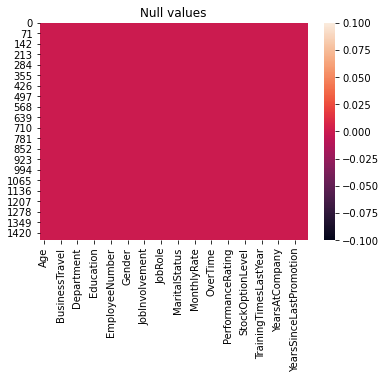

In [298]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

The dataset has no null values

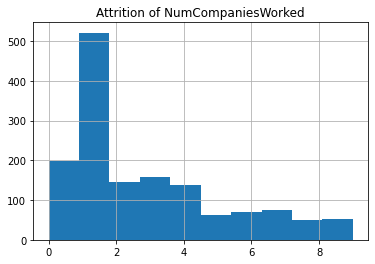

In [299]:
df['NumCompaniesWorked'].hist(grid=True)
plt.title("Attrition of NumCompaniesWorked")
plt.show()

Employees who already left many organization previously tend to contribute more in attrition than other employee

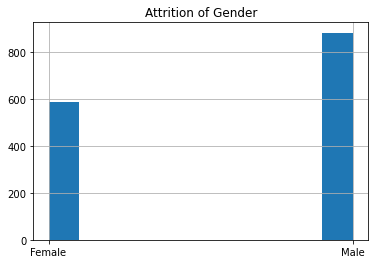

In [300]:
df['Gender'].hist(grid=True)
plt.title("Attrition of Gender")
plt.show()

The attrition rate is higher in male employee  than female

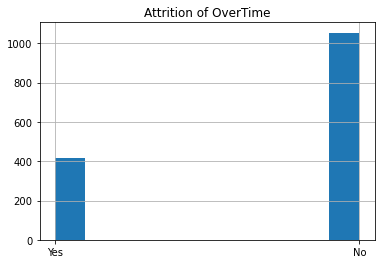

In [301]:
df['OverTime'].hist(grid=True)
plt.title("Attrition of OverTime")
plt.show()

Employees who deployed on overtime seems to be contribute more in attrition rate

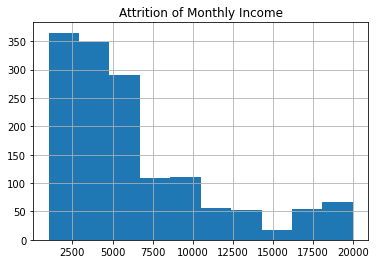

In [302]:
df['MonthlyIncome'].hist(grid=True)
plt.title("Attrition of Monthly Income")
plt.show()

The attrition rate is higher who are getting lower package

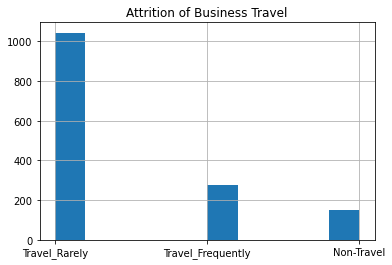

In [303]:
df['BusinessTravel'].hist(grid=True)
plt.title("Attrition of Business Travel")
plt.show()

The graph shows that the employee who are travelling more are more to tend to leave their orgaanizations.

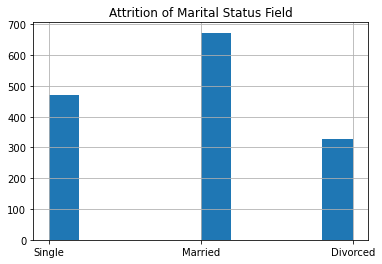

In [304]:
df['MaritalStatus'].hist(grid=True)
plt.title("Attrition of Marital Status Field")
plt.show()

The graph shows that single employees ratio is heigher than married and divorced employee

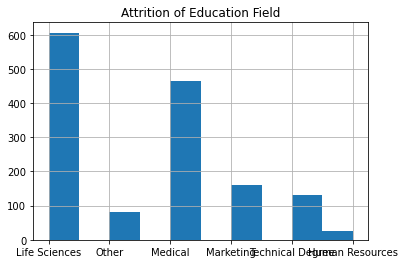

In [305]:
df['EducationField'].hist(grid=True)
plt.title("Attrition of Education Field")
plt.show()

The heighest number of attrition found in Life science

In [306]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()
df["Attrition"]=LE.fit_transform(df["Attrition"])
df["BusinessTravel"]=LE.fit_transform(df["BusinessTravel"])
df["Department"]=LE.fit_transform(df["Department"])
df["EducationField "]=LE.fit_transform(df["EducationField"])
df["Gender"]=LE.fit_transform(df["Gender"])
df["JobRole"]=LE.fit_transform(df["JobRole"])
df["MaritalStatus"]=LE.fit_transform(df["MaritalStatus"])
df["OverTime"]=LE.fit_transform(df["OverTime"])
df["EducationField"]=LE.fit_transform(df["EducationField"])

In [307]:
dfcor=df.corr() 
dfcor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.040873
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.026846
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.023724
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.037709
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.013720
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.002013
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.039592
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,1.000000
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.002516
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.043163


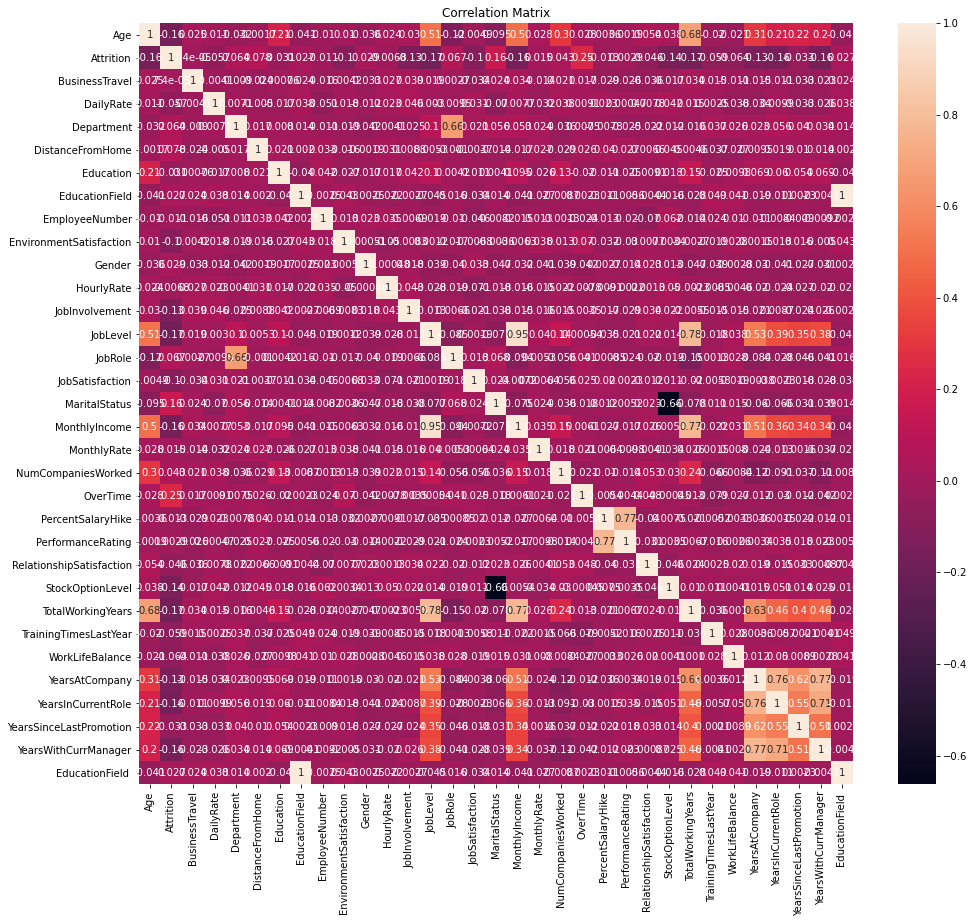

In [308]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

As per above graphics some of the variable are moderately correlated with Attrition and some of the variable are negatively correlated with attrition

In [309]:
corr_matrix=df.corr()

In [310]:
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Y

Age                            AxesSubplot(0.125,0.772143;0.0945122x0.107857)
Attrition                   AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
BusinessTravel              AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
DailyRate                   AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
Department                  AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
DistanceFromHome            AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
Education                   AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
EducationField                 AxesSubplot(0.125,0.642714;0.0945122x0.107857)
EmployeeNumber              AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
Gender                      AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
HourlyRate                  AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
JobInvolvement              AxesSubplot(0.692073,0.642714;0.0945

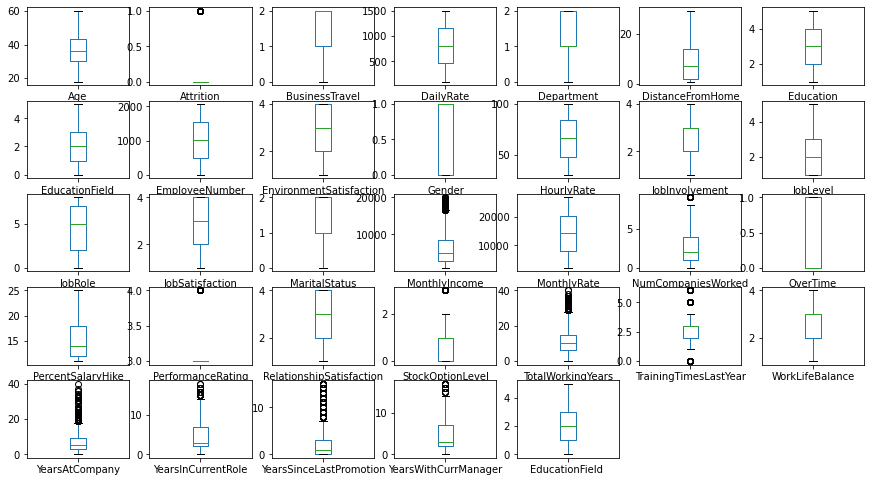

In [311]:
df.plot(kind='box',subplots=True, layout=(6,7), figsize= (15,10))

The columns Monthly Income ,Num companyes worked,Stock option level,Total working year,training times last year,Years at company,years in current role,years since last promotion,years with current manager and education feild has outliers. Lets remove it to increase the model performance

In [312]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.67914568, 0.24583399,
        0.93741369],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.36871529, 0.80654148,
        0.93741369],
       [0.008343  , 2.28090588, 0.59004834, ..., 0.67914568, 1.15593471,
        1.31667267],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.67914568, 0.31487349,
        0.93741369],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.67914568, 1.08689522,
        0.56531055],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.36871529, 0.59522723,
        0.56531055]])

In [313]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [314]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 33)
(1387, 33)


In [315]:
loss_percent=(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


The loss of data is 5.64 percent,which is under prescribed limit

In [316]:
df.skew() # Checking Skewness

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Removing skewness through Log methods

In [317]:
skew=("BusinessTravel","JobLevel","MonthlyIncome","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [318]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
W

Seprating target variable from independent variables

In [319]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

Scalling data with the help of StandardScaler

In [320]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.97334237,
         0.24583399, -0.93741369],
       [ 1.32236521, -0.91319439, -1.2977746 , ..., -0.11727147,
         0.80654148, -0.93741369],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -0.97334237,
        -1.15593471,  1.31667267],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.97334237,
        -0.31487349, -0.93741369],
       [ 1.32236521, -0.91319439,  0.54667746, ..., -0.97334237,
         1.08689522,  0.56531055],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.11727147,
        -0.59522723,  0.56531055]])

Finding out the best accurancy and Random_state

In [321]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.9666666666666667 on Random_state 17


Training,testing and validating the dataset

In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=17)

In [323]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    

0.9666666666666667
[[29  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



In [324]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8666666666666667
[[26  3]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.00      0.00      0.00         1

    accuracy                           0.87        30
   macro avg       0.48      0.45      0.46        30
weighted avg       0.93      0.87      0.90        30



In [325]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9666666666666667
[[29  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



In [326]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9333333333333333
[[28  1]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.00      0.00      0.00         1

    accuracy                           0.93        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.93      0.93      0.93        30



In [327]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.8775510204081632


In [328]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 0.7843537414965988


In [329]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.8625850340136054


In [330]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.85578231292517


Minimum difference in accuracy and cross validation score is for RandomForestClassifier so this is our best model

In [331]:
from sklearn.model_selection import GridSearchCV #hyper tuning the system with GridSearchCV

In [332]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [333]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [334]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [335]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'entropy', 'max_depth': 12}

In [336]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [337]:
accuracy_score(y_test,GCV_pred)

0.9333333333333333

In [338]:
#Saving model

import joblib
joblib.dump(rf,"HRAttrition.obj")

['HRAttrition.obj']

In [339]:
p=joblib.load("HRAttrition.obj")

In [340]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0
